# Exercício 3

## Exercício 3.1

Use o matplotlib e o scipy para desenhar o seguintes gráficos:
1. $y = ln(x)$
2. $y = e^x$

Como você faria para ter uma figura com 2 subplots, cada um com um dos gráficos?

## Exercício 3.2

O código abaixo gera um gráfico 3D para o atrator de Lorenz.
Cada elemento `i` das array `xs`, `ys` e `zs` é uma o valor da coordenada no instante `i` e a função `lorenz` caulcula as derivadas das coordenadas.
O loop 
```python
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)
```
calcula o valor das coordenadas em `i+1` dado o valor em `i`.

Crie, usando o trabalho já feito nesse código, uma animação para mostrar o atrator de Lorenz sendo plotado a cada instante.

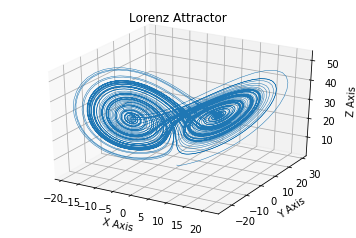

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 10000

# o shape das arrays é o número de passos + 1 para os valores iniciais
xs = np.empty((num_steps + 1,))
ys = np.empty((num_steps + 1,))
zs = np.empty((num_steps + 1,))

# Valores iniciais
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Caminha no "tempo", calculando as derivatas no instante atual e 
# os usando para estimar o próximo ponto
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

## Exercício 3.3 

Vá ao site da galeria do matplotlib, escolha um gráfico pela imagem e tente reproduzí-lo.
Se não conseguir depois de 10 minutos, olhe o código e copie. Depois escolhar outro e repita as instruções.
O exercício termina quando você reproduzir gráficos o bastante para entender como se virar sozinho.